In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import preprocessing

from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [529]:
house = pd.read_csv("train.csv")
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [530]:
house.shape

(1460, 81)

In [531]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [532]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [533]:
# Separating the Numerical and Categorical features for analysis
numeric_df = house.select_dtypes(include=['int64', 'float64'])
categorical_df = house.select_dtypes(include=['object'])

In [534]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Outlier Detection

In [535]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(0.75)-numeric_df[feature].quantile(0.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(0.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(0.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


## Outliers Handling

as many of the features has outliers, reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.

In [536]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = house[feature].quantile(.75) - house[feature].quantile(.25) 
        max_value = house[feature].quantile(.75)+1.5*IQR
        min_value = house[feature].quantile(.25)-1.5*IQR
        house[feature][house[feature] > max_value] = max_value
        house[feature][house[feature] < min_value ] = min_value

In [537]:
# Checking the dataset after reassigning minmum and maximum values
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


#### Correlation in Numeric Data

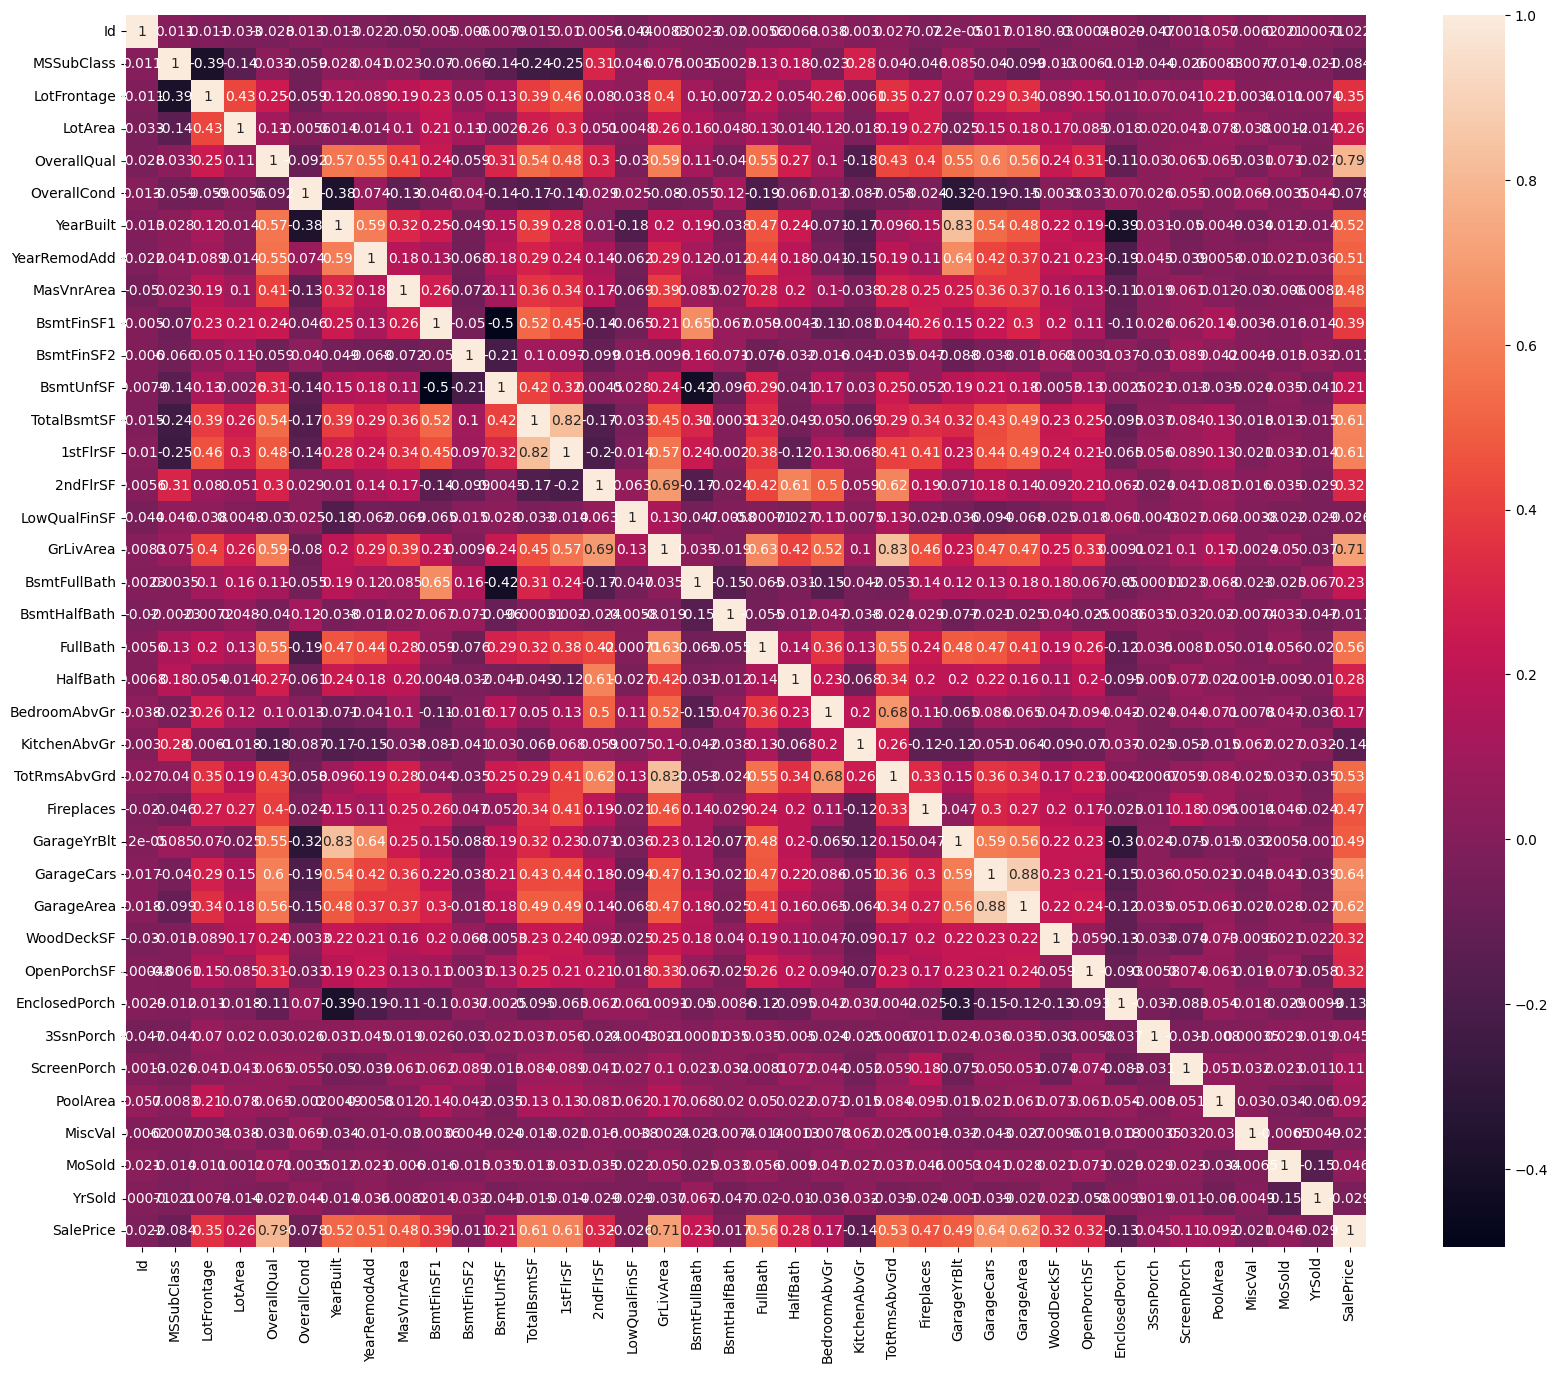

In [538]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Some of the features have high correlation with each other
- TotRmsAbvGrd and GrLivArea (0.83)
- GarageArea & GarageCars (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair can be dropped.

In [539]:
house[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,1503.735873,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0
std,0.0,481.375641,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1129.500000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1464.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1776.750000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2747.625000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0


### Removing these features having fixed values as they won't contribute in predicting SalePrice

In [540]:
house[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [541]:
house.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'KitchenAbvGr'], axis=1, inplace=True)

# Checking the remaining columns
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 

### Null value check and handle

In [542]:
null_col_list = house.columns[house.isna().any()].tolist()
null_col_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [543]:
house[null_col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

### Dropping unnecessary fields or having more null values 

In [544]:
house = house.drop(['Id','Alley','PoolQC','MiscFeature'], axis=1)

### Replacement of Null values using their median and Not_applicable

In [545]:
null_col_list = house.columns[house.isna().any()].tolist()
col_float = list(house[null_col_list].select_dtypes(include='float64'))
col_object = list(house[null_col_list].select_dtypes(include='object'))


In [546]:
# col_float = ['LotFrontage','MasVnrArea','GarageYrBlt']
# col_object = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence']
              
for col in col_float:
    house[col] = house[col].fillna(house[col].quantile(0.50))

for col in col_object:
    house[col] = house[col].fillna('Not_applicable')

### No null value exist anymore

In [547]:
null_col_list = house.columns[house.isna().any()].tolist()
null_col_list

[]

### Making all the categorical variable to numeric variable using Label Encoder

In [548]:
catg_var = list(house.select_dtypes(include='object'))
print(len(catg_var))

le = preprocessing.LabelEncoder()

for cat in catg_var:
    house[cat] = le.fit_transform(house[cat])

house.head()

40


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450.0,1,3,3,0,4,0,...,5,2,0,61,4,2,2008,8,4,208500
1,20,3,80.0,9600.0,1,3,3,0,2,0,...,5,2,298,0,4,5,2007,8,4,181500
2,60,3,68.0,11250.0,1,0,3,0,4,0,...,5,2,0,42,4,9,2008,8,4,223500
3,70,3,60.0,9550.0,1,0,3,0,0,0,...,5,2,0,35,4,2,2006,8,0,140000
4,60,3,84.0,14260.0,1,0,3,0,2,0,...,5,2,192,84,4,12,2008,8,4,250000


In [549]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MoSol

In [550]:
x1 = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']
x2 = ['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope']
x3 = ['Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle']
x4 = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle']
x5 = ['RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea']
x6 = ['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond']
x7 = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
x8 = ['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC']
x9 = ['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea']
x10 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
x11 = ['KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces']
x12 = ['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish','SaleCondition']
x13 = ['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
x14 = ['WoodDeckSF', 'OpenPorchSF', 'Fence', 'MoSold', 'YrSold', 'SaleType']

### Visualising all features with Sale Price

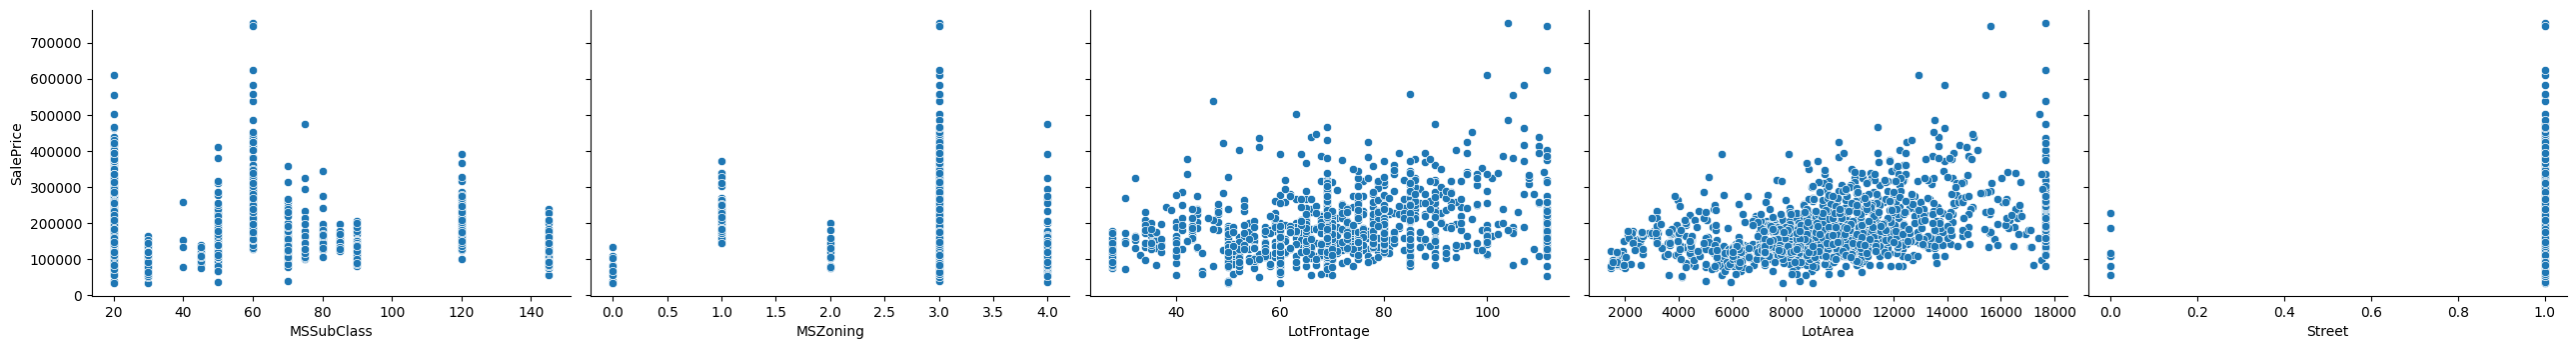

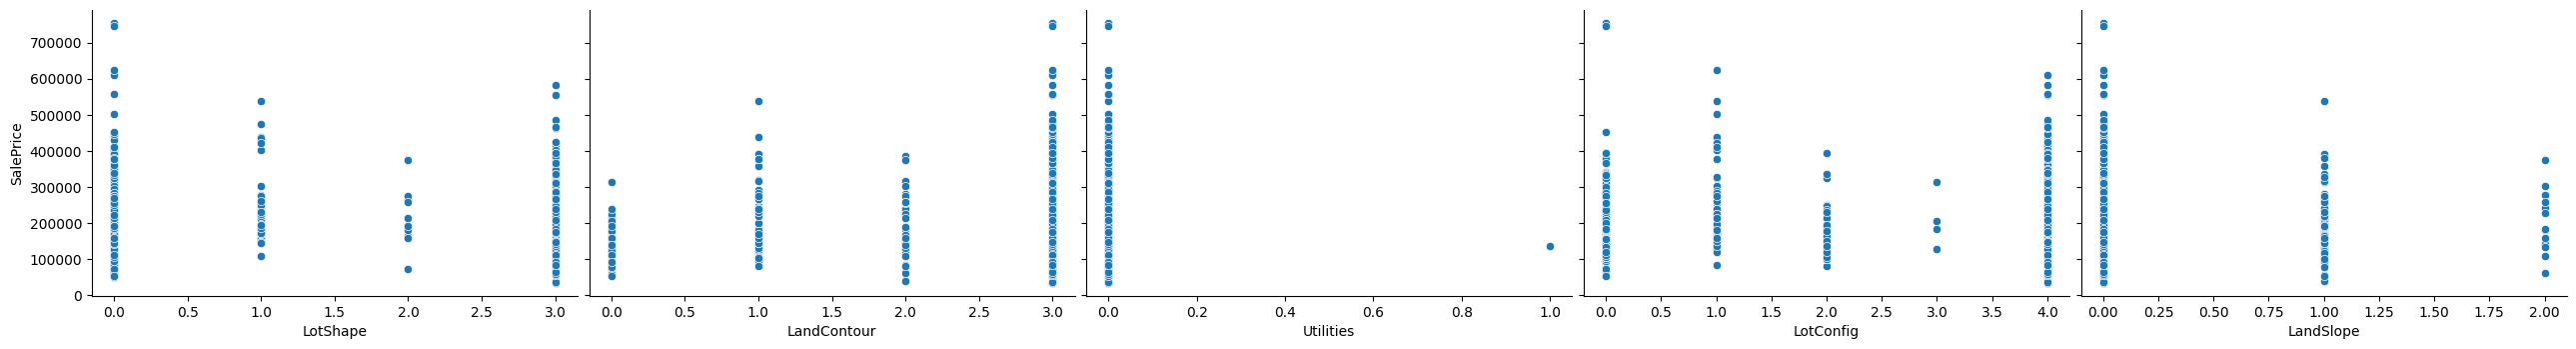

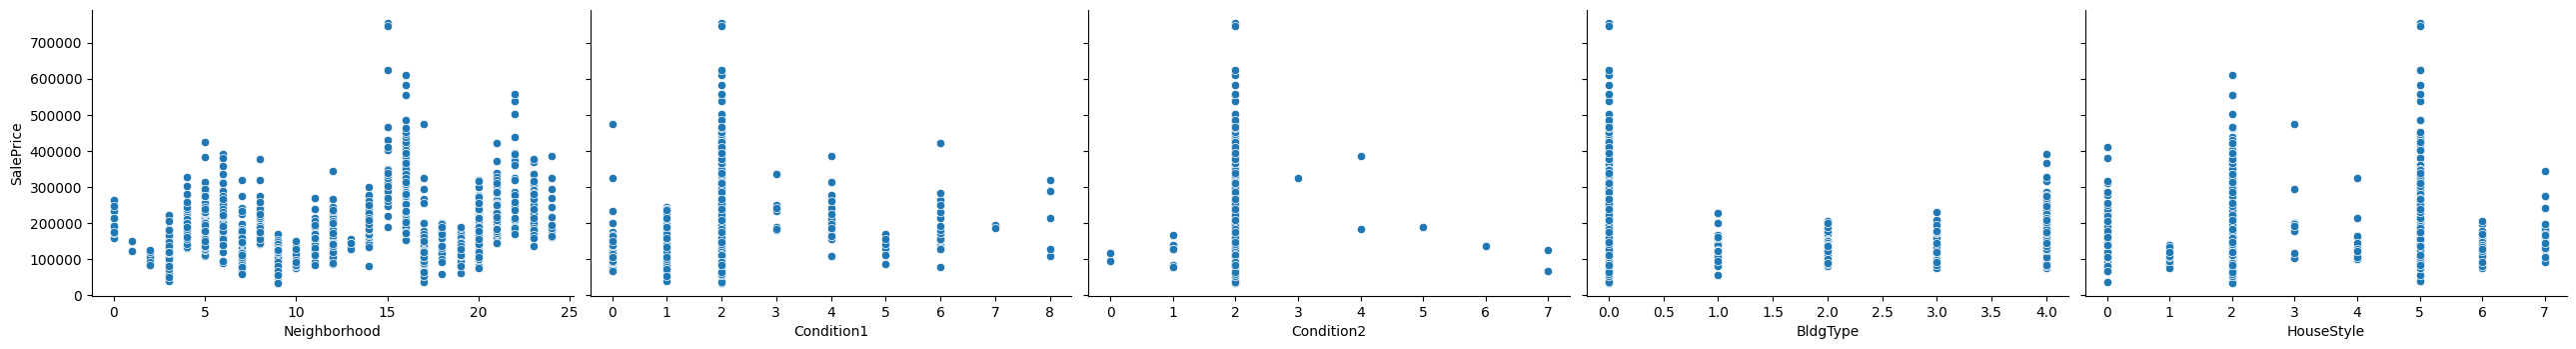

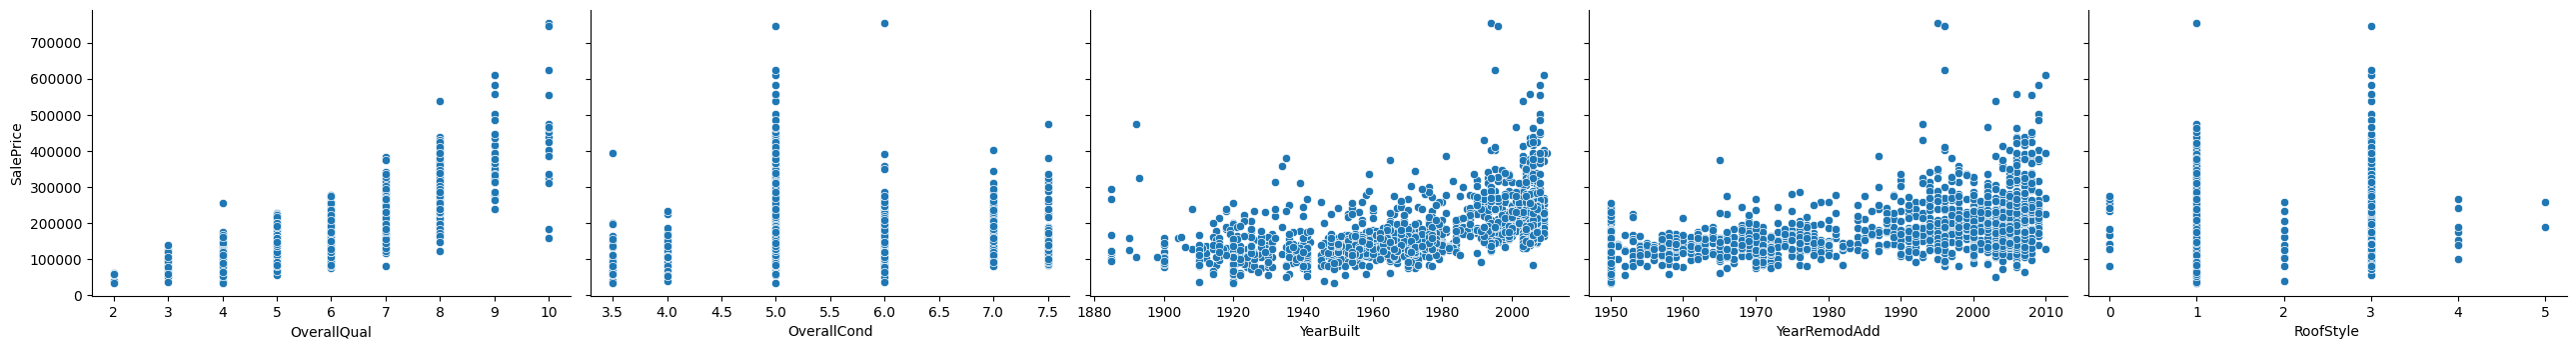

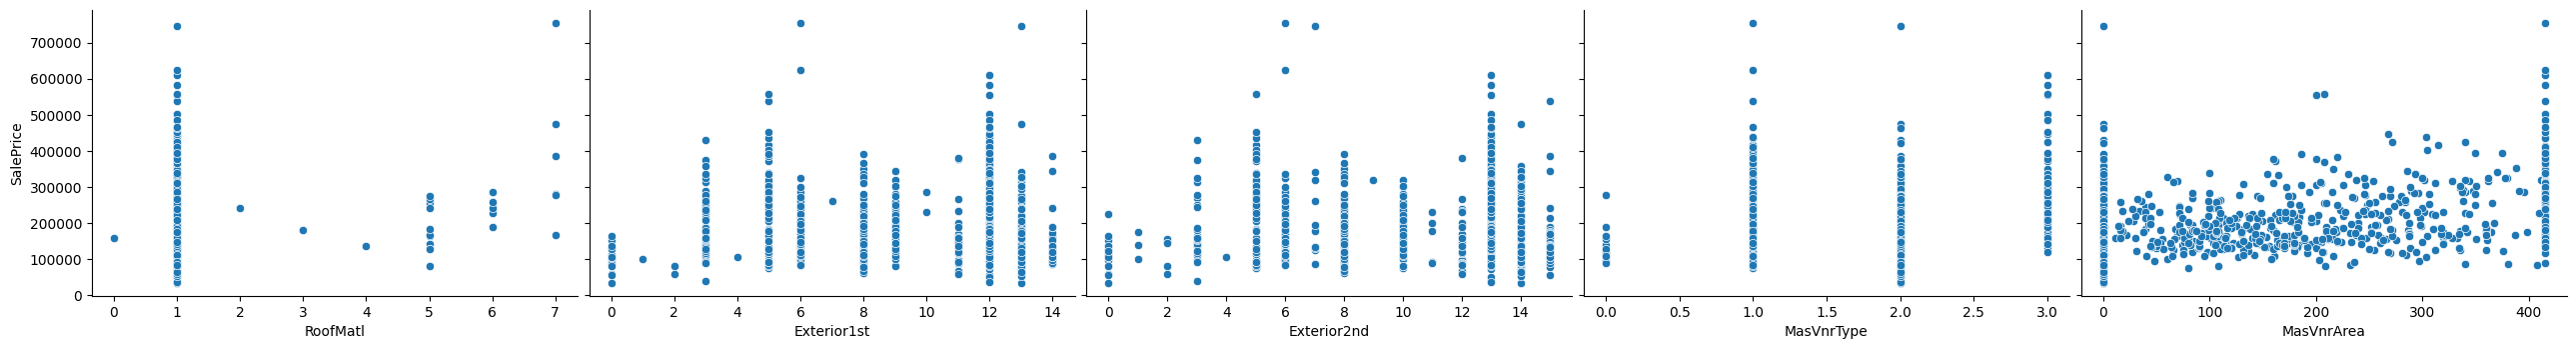

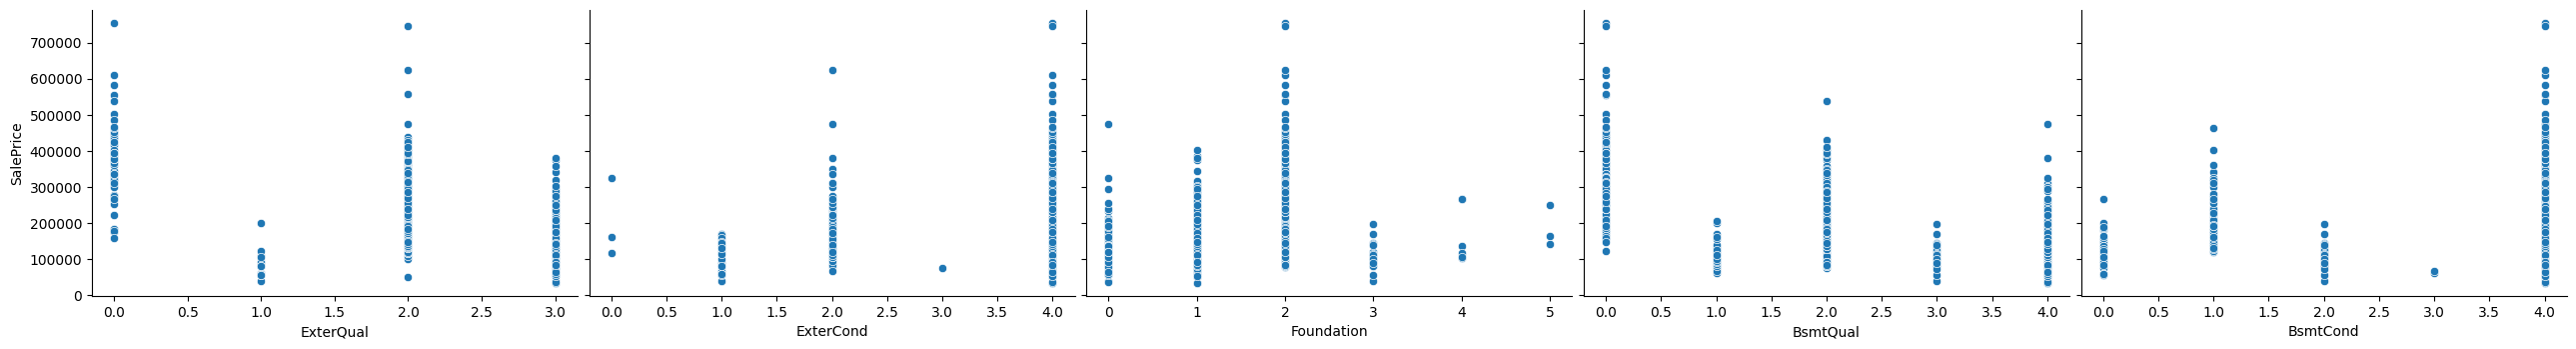

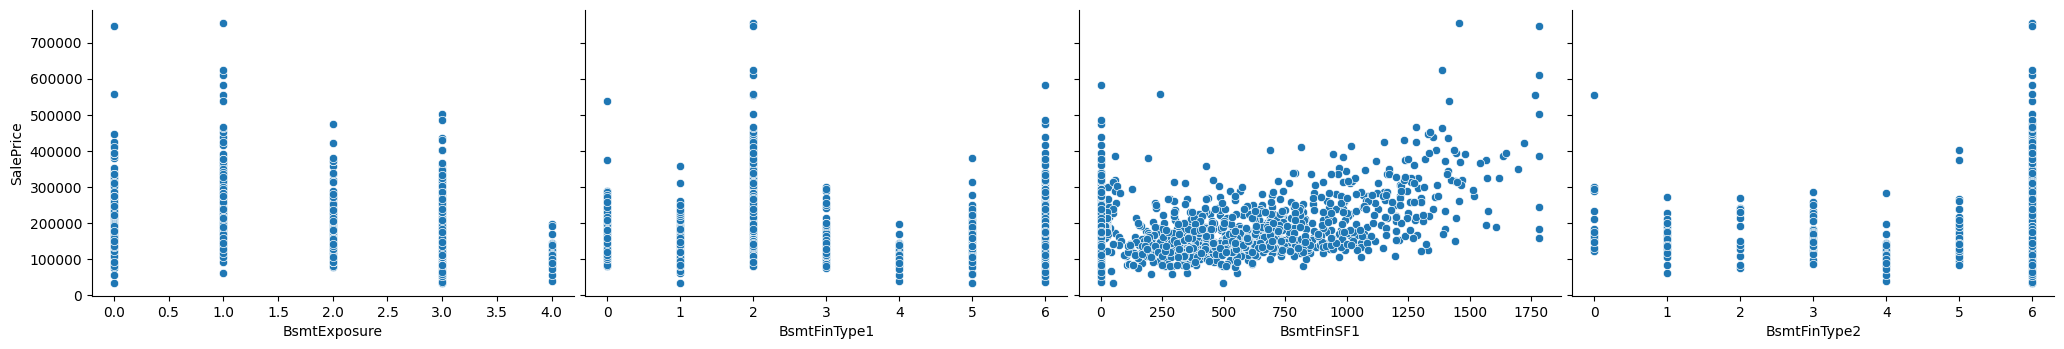

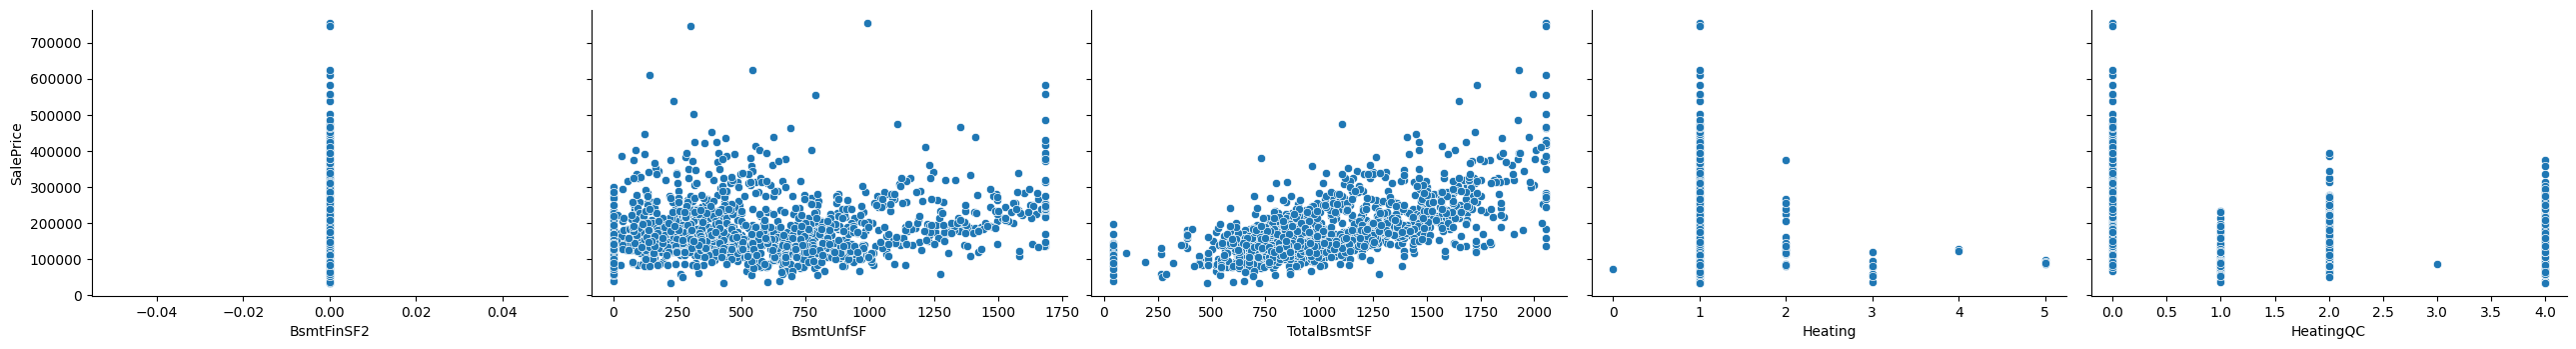

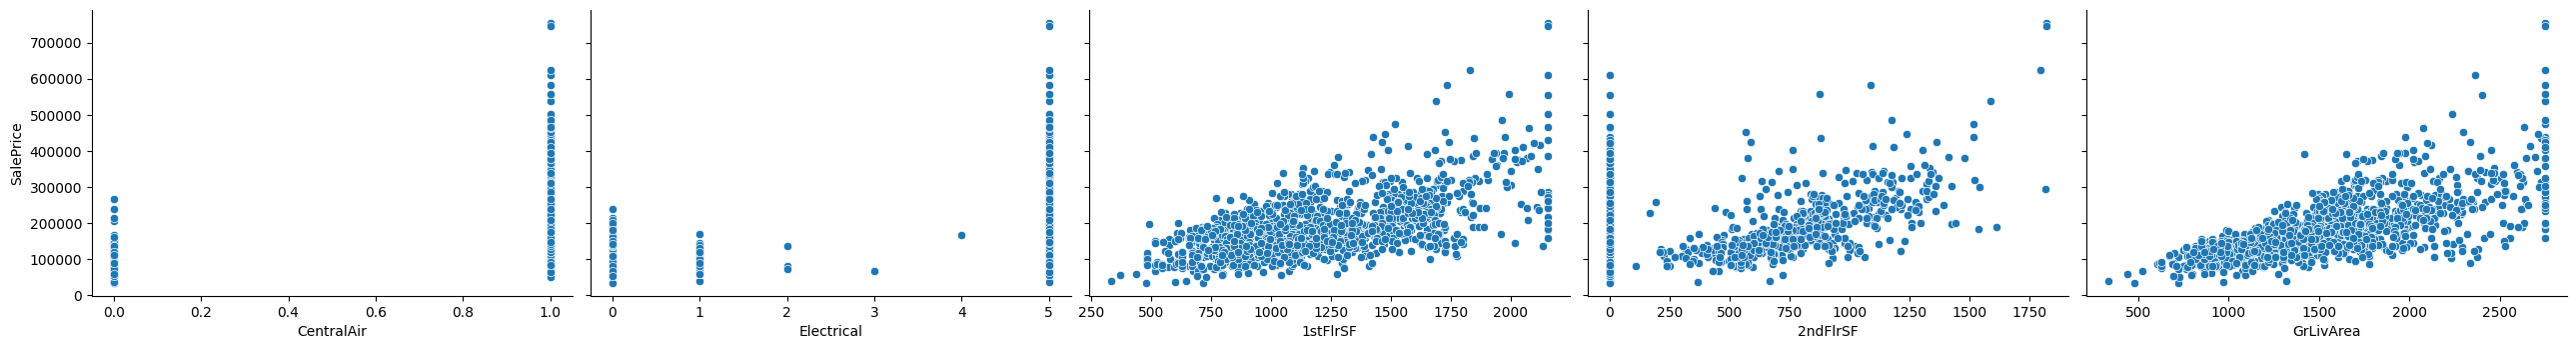

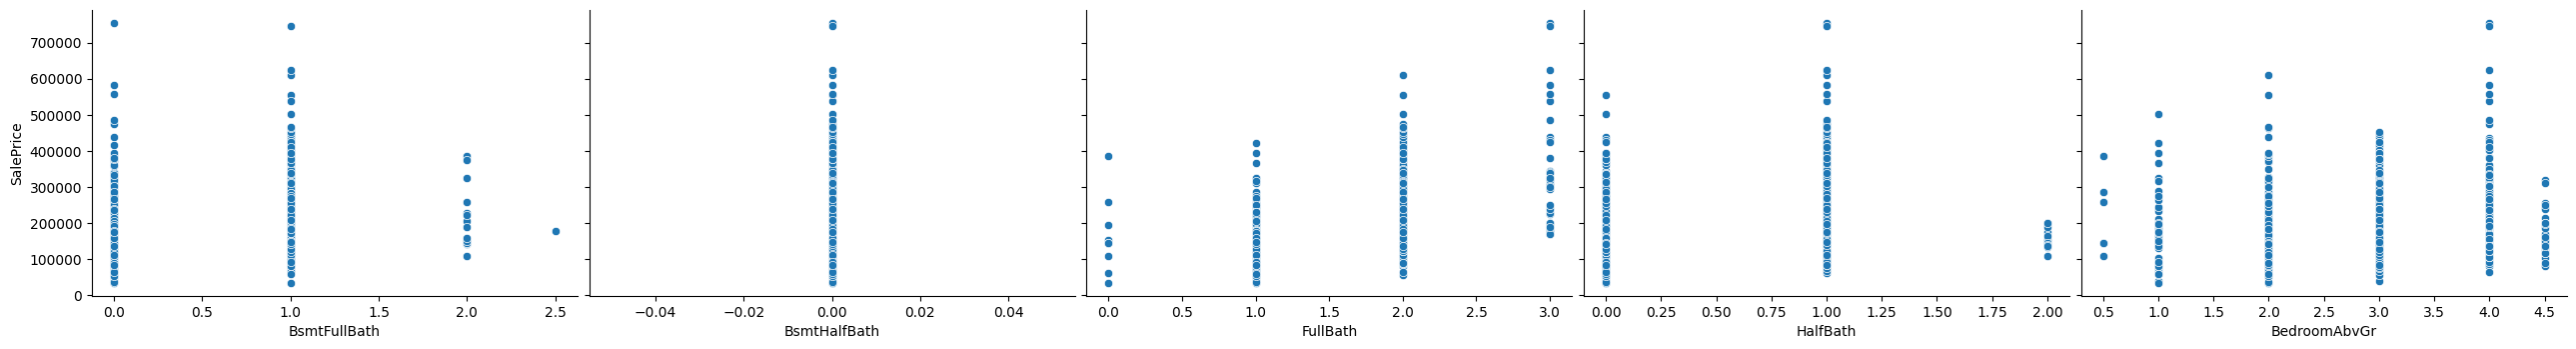

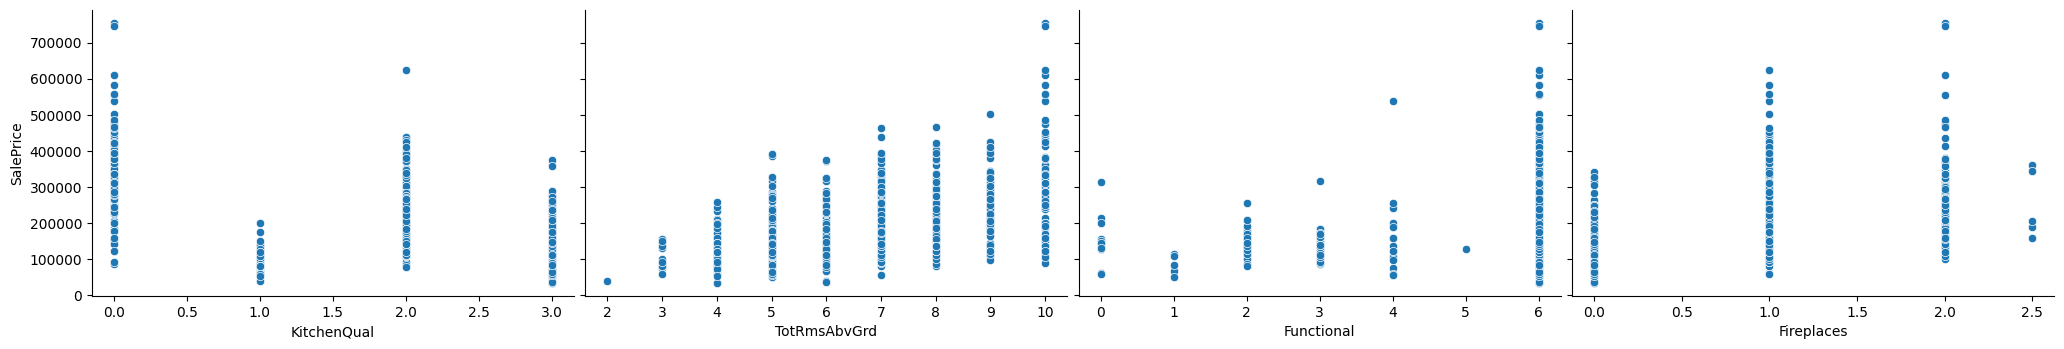

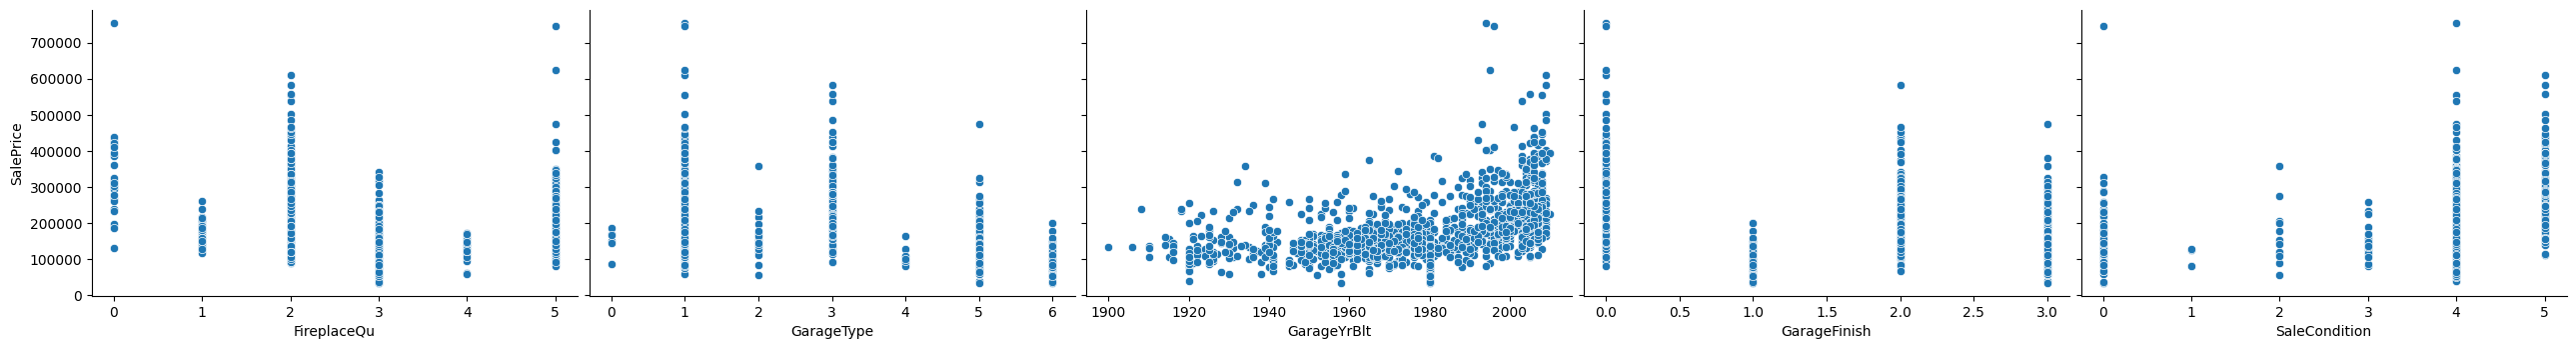

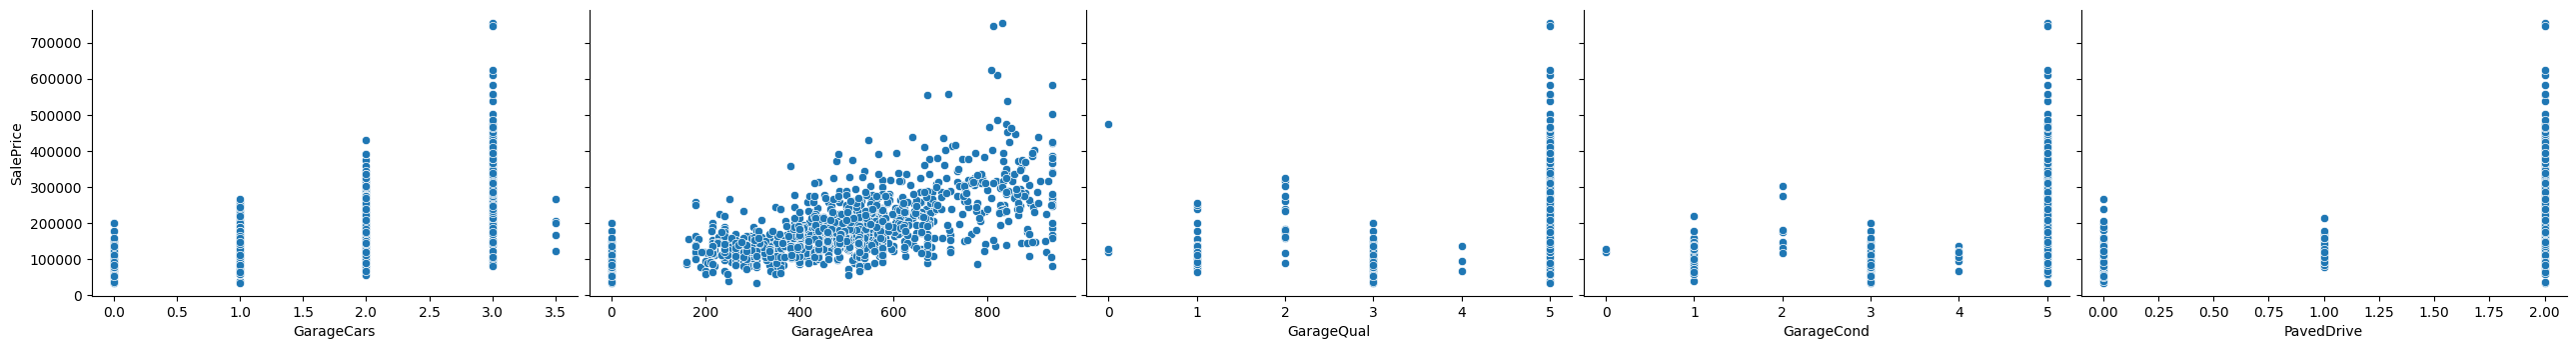

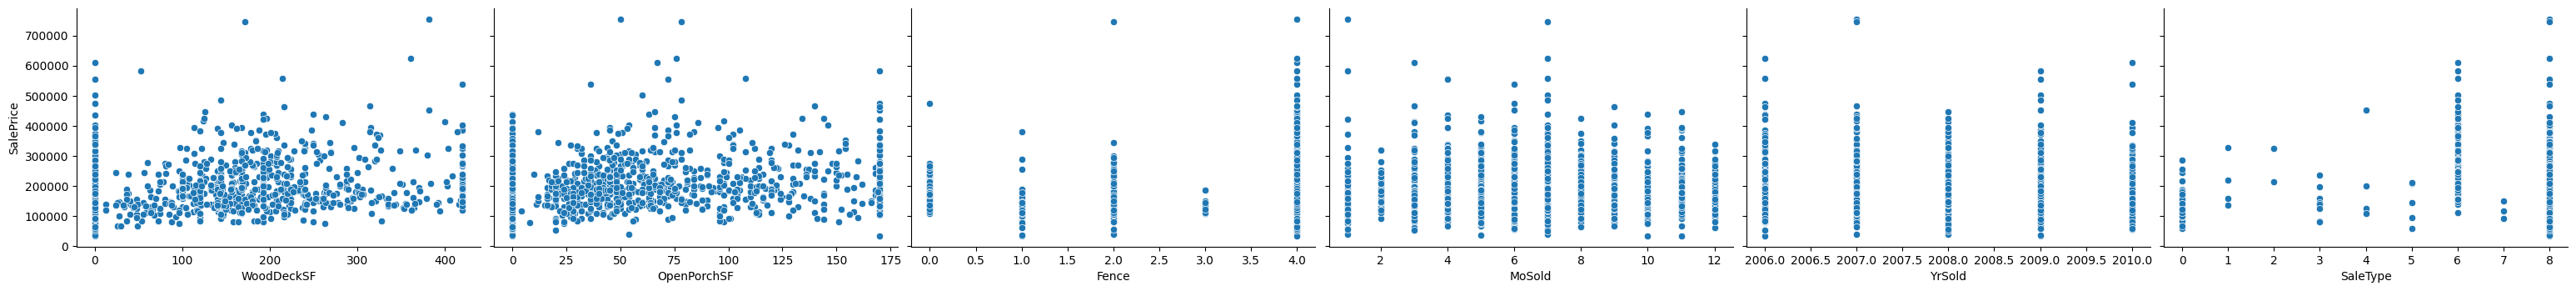

In [551]:
sns.pairplot(house, x_vars = x1, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x2, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x3, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x4, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x5, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x6, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x7, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x8, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x9, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x10, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x11, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x12, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x13, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)
sns.pairplot(house, x_vars = x14, y_vars = 'SalePrice', height = 3.5, aspect = 1.5)

### Splitting

In [552]:
X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450.0,1,3,3,0,4,0,...,5,5,2,0,61,4,2,2008,8,4
1,20,3,80.0,9600.0,1,3,3,0,2,0,...,5,5,2,298,0,4,5,2007,8,4
2,60,3,68.0,11250.0,1,0,3,0,4,0,...,5,5,2,0,42,4,9,2008,8,4
3,70,3,60.0,9550.0,1,0,3,0,0,0,...,5,5,2,0,35,4,2,2006,8,0
4,60,3,84.0,14260.0,1,0,3,0,2,0,...,5,5,2,192,84,4,12,2008,8,4


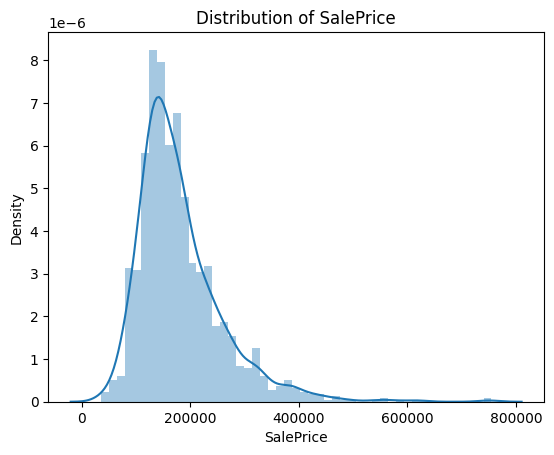

In [553]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(house['SalePrice'])
plt.show()

#### Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

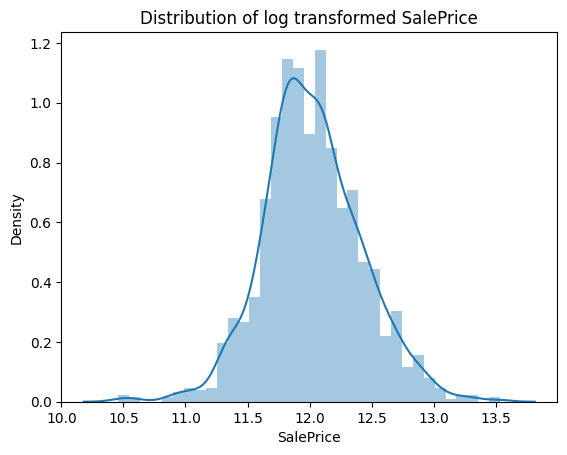

In [554]:
sns.distplot(np.log(house['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [555]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building
y = np.log(house['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


In [556]:
#house_train, house_test = train_test_split(house, train_size= 0.7, random_state= 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [557]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 69)
(438, 69)
(1022,)
(438,)


### Linear Regression pipeline with MinmaxScaler

In [558]:
scaler = MinMaxScaler()
linear_reg = LinearRegression()
linear_reg_pipeline = make_pipeline(scaler, linear_reg)
linear_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [559]:
y_pred_linear_reg_train = linear_reg_pipeline.predict(X_train)
y_pred_linear_reg_test = linear_reg_pipeline.predict(X_test)

r2_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)
r2_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)
print("Training R-squared:")
print(f"Linear Regression: {r2_linear_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Linear Regression: {r2_linear_reg_test:.2f}")

Training R-squared:
Linear Regression: 0.91

Testing R-squared:
Linear Regression: 0.88


In [560]:
rss_train = np.sum(np.square(y_train - y_pred_linear_reg_train))
print(f"Training RSS: {rss_train:.2f}")
rss_test = np.sum(np.square(y_test - y_pred_linear_reg_test))
print(f"Testing RSS: {rss_test:.2f}" )

mse_train = mean_squared_error(y_train, y_pred_linear_reg_train)
print(f"Training MSE: {mse_train:.2f}")
mse_test = mean_squared_error(y_test, y_pred_linear_reg_test)
print(f"Testing MSE: {mse_test:.2f}")

# Root Mean Squared error
rmse_train = mse_train**0.5
print(f"Training RMSE: {rmse_train:.2f}")
rmse_test = mse_test**0.5
print(f"Testing RMSE: {rmse_test:.2f}")

Training RSS: 14.95
Testing RSS: 8.48
Training MSE: 0.01
Testing MSE: 0.02
Training RMSE: 0.12
Testing RMSE: 0.14


### Ridge Regression With MinMaxScaler (Regularisation Technique)

In [561]:
scaler = MinMaxScaler()
ridge_reg = Ridge(alpha = 5.4)
ridge_reg_pipeline = make_pipeline(scaler, ridge_reg)
ridge_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('ridge', Ridge(alpha=5.4))])

In [562]:
y_pred_ridge_reg_train = ridge_reg_pipeline.predict(X_train)
y_pred_ridge_reg_test = ridge_reg_pipeline.predict(X_test)

r2_ridge_reg_train = r2_score(y_train, y_pred_ridge_reg_train)
r2_ridge_reg_test = r2_score(y_test, y_pred_ridge_reg_test)
print("Training R-squared:")
print(f"Ridge Regression: {r2_ridge_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Ridge Regression: {r2_ridge_reg_test:.2f}")

Training R-squared:
Ridge Regression: 0.90

Testing R-squared:
Ridge Regression: 0.88


In [563]:
rss_train = np.sum(np.square(y_train - y_pred_ridge_reg_train))
print(f"Training RSS: {rss_train:.2f}")
rss_test = np.sum(np.square(y_test - y_pred_ridge_reg_test))
print(f"Testing RSS: {rss_test:.2f}" )

mse_train = mean_squared_error(y_train, y_pred_ridge_reg_train)
print(f"Training MSE: {mse_train:.2f}")
mse_test = mean_squared_error(y_test, y_pred_ridge_reg_test)
print(f"Testing MSE: {mse_test:.2f}")

# Root Mean Squared error
rmse_train = mse_train**0.5
print(f"Training RMSE: {rmse_train:.2f}")
rmse_test = mse_test**0.5
print(f"Testing RMSE: {rmse_test:.2f}")

Training RSS: 15.54
Testing RSS: 8.61
Training MSE: 0.02
Testing MSE: 0.02
Training RMSE: 0.12
Testing RMSE: 0.14


### Lasso Regression with Minmax Scaler

In [564]:
scaler = MinMaxScaler()
lasso_reg = Lasso(alpha = 0.0008) 
lasso_reg_pipeline = make_pipeline(scaler, lasso_reg)
lasso_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=0.0008))])

In [565]:
y_pred_lasso_reg_train = lasso_reg_pipeline.predict(X_train)
y_pred_lasso_reg_test = lasso_reg_pipeline.predict(X_test)
r2_lasso_reg_train = r2_score(y_train, y_pred_lasso_reg_train)
r2_lasso_reg_test = r2_score(y_test, y_pred_lasso_reg_test)

print("Training R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_test:.2f}")

Training R-squared:
Lasso Regression: 0.90

Testing R-squared:
Lasso Regression: 0.89


In [566]:
rss_train = np.sum(np.square(y_train - y_pred_lasso_reg_train))
print(f"Training RSS: {rss_train:.2f}")
rss_test = np.sum(np.square(y_test - y_pred_lasso_reg_test))
print(f"Testing RSS: {rss_test:.2f}" )

mse_train = mean_squared_error(y_train, y_pred_lasso_reg_train)
print(f"Training MSE: {mse_train:.2f}")
mse_test = mean_squared_error(y_test, y_pred_lasso_reg_test)
print(f"Testing MSE: {mse_test:.2f}")

# Root Mean Squared error
rmse_train = mse_train**0.5
print(f"Training RMSE: {rmse_train:.2f}")
rmse_test = mse_test**0.5
print(f"Testing RMSE: {rmse_test:.2f}")

Training RSS: 15.58
Testing RSS: 7.89
Training MSE: 0.02
Testing MSE: 0.02
Training RMSE: 0.12
Testing RMSE: 0.13


#### Residual Analysis on Train data

<Axes: xlabel='SalePrice', ylabel='Density'>

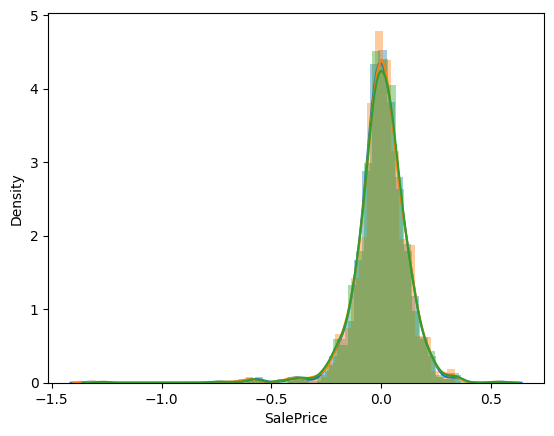

In [567]:
res_linear = y_train - y_pred_linear_reg_train
res_ridge = y_train - y_pred_ridge_reg_train
res_lasso = y_train - y_pred_lasso_reg_train
sns.distplot(res_linear)
sns.distplot(res_ridge)
sns.distplot(res_lasso)

#### Residual Analysis on Test data

<Axes: xlabel='SalePrice', ylabel='Density'>

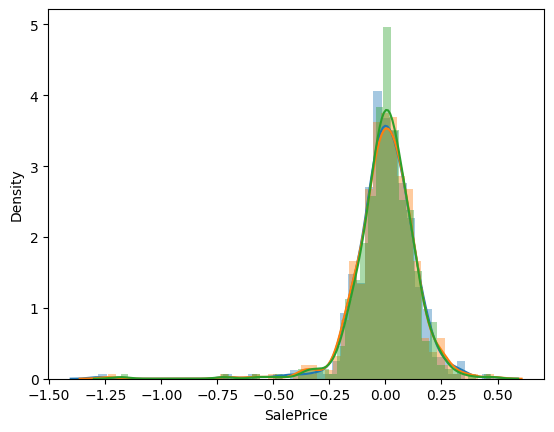

In [568]:
res_linear = y_test - y_pred_linear_reg_test
res_ridge = y_test - y_pred_ridge_reg_test
res_lasso = y_test - y_pred_lasso_reg_test
sns.distplot(res_linear)
sns.distplot(res_ridge)
sns.distplot(res_lasso)

# Subjective Question

In [569]:
# doubling the optimal alpha value for ridge regression

ridge_reg = Ridge(alpha = 10.8)
ridge_reg_pipeline = make_pipeline(scaler, ridge_reg)
ridge_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('ridge', Ridge(alpha=10.8))])

In [570]:
# doubling the optimal alpha value for lasso regression

lasso_reg = Lasso(alpha = 0.0016) 
lasso_reg_pipeline = make_pipeline(scaler, lasso_reg)
lasso_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=0.0016))])

In [571]:
lasso_model = lasso_reg_pipeline.named_steps['lasso']
coefficients = lasso_model.coef_

# len(X_test.columns)
model_coefficients = pd.DataFrame(index=X_train.columns)
model_coefficients.rows = X_train.columns

model_coefficients['lasso coeff'] = coefficients

model_coefficients.sort_values(by='lasso coeff', ascending=False).head(1)

,lasso coeff
GrLivArea,0.587332


In [572]:
model_coefficients.sort_values(by='lasso coeff', ascending=False).head(5)

,lasso coeff
GrLivArea,0.587332
OverallQual,0.495782
TotalBsmtSF,0.227947
YearBuilt,0.168488
OverallCond,0.162628


In [573]:
top_five_col = list(model_coefficients.sort_values(by='lasso coeff', ascending=False).head(5).index)

X1 = X.drop(top_five_col,axis=1)
len(X1.columns)

64

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 50)

In [575]:
lasso_reg = Lasso(alpha = 0.003) 
lasso_reg_pipeline = make_pipeline(scaler, lasso_reg)
lasso_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=0.003))])

In [576]:
y_pred_lasso_reg_train = lasso_reg_pipeline.predict(X_train)
y_pred_lasso_reg_test = lasso_reg_pipeline.predict(X_test)
r2_lasso_reg_train = r2_score(y_train, y_pred_lasso_reg_train)
r2_lasso_reg_test = r2_score(y_test, y_pred_lasso_reg_test)

print("Training R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_test:.2f}")

Training R-squared:
Lasso Regression: 0.87

Testing R-squared:
Lasso Regression: 0.84


In [577]:
lasso_model = lasso_reg_pipeline.named_steps['lasso']
coefficients = lasso_model.coef_

# len(X_test.columns)
model_coefficients = pd.DataFrame(index=X_train.columns)
model_coefficients.rows = X_train.columns

model_coefficients['lasso coeff'] = coefficients
model_coefficients.sort_values(by='lasso coeff', ascending=False).head(5)

,lasso coeff
1stFlrSF,0.543016
2ndFlrSF,0.386627
BsmtFinSF1,0.179855
GarageCars,0.179630
YearRemodAdd,0.176744
